In [5]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = pd.read_csv("data/city_data.csv")
ride_data_to_load = pd.read_csv("data/ride_data.csv")

# Read the City and Ride Data
city_data_to_load.head()
#ride_data_to_load.head()
# Combine the data into a single dataset
ride_share_data = pd.merge(city_data_to_load, ride_data_to_load, how="right", on=["city", "city"])
# Display the data table for preview
ride_share_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [6]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


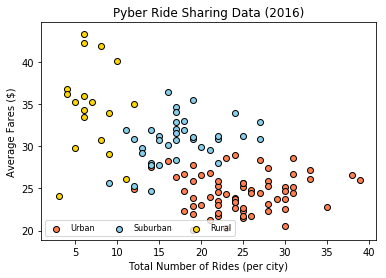

In [16]:
#groupby city
grouped_city = ride_share_data.groupby(['city', 'type', 'driver_count'])

#average fares by city
average_fare_series = grouped_city.fare.mean()

average_fare = pd.DataFrame(average_fare_series)


#total rides by city
total_rides_series = grouped_city.size()

total_rides = pd.DataFrame(total_rides_series)

rides_fares = average_fare.join(total_rides)
rides_fares.columns = ['fare', 'total_rides']
rides_fares = rides_fares.reset_index(level = ['driver_count', 'type'])


#scatter plot of total of average fare by total rides

#color picker for scatter
type_to_color = {
    "Urban": "coral",
    "Suburban": "skyblue",
    'Rural': "gold"
}

def color_picker(x):
    return type_to_color.get(x)
    
rides_fares['color'] = rides_fares['type'].map(color_picker)
rides_fares.head()

# x and y for each city type
urban = rides_fares[rides_fares['type'] == 'Urban']
urban_rides = urban.total_rides
urban_fares = urban.fare


suburban = rides_fares[rides_fares['type'] == 'Suburban']
suburban_rides = suburban.total_rides
suburban_fares = suburban.fare


rural = rides_fares[rides_fares['type'] == 'Rural']
rural_rides = rural.total_rides
rural_fares = rural.fare


#Scatter plot for each city type
urban_scatter = plt.scatter(urban_rides, urban_fares, marker="o",\
            facecolors="coral", edgecolors="black")
suburban_scatter = plt.scatter(suburban_rides, suburban_fares, marker="o",\
            facecolors="skyblue", edgecolors="black")
rural_scatter = plt.scatter(rural_rides, rural_fares,marker="o",\
            facecolors="gold", edgecolors="black")

plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fares ($)")
plt.xlabel("Total Number of Rides (per city)")

plt.legend((urban_scatter, suburban_scatter, rural_scatter),
           ('Urban', 'Suburban', 'Rural'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.show()


Text(0.5, 0, 'Total Number of Rides (per city)')

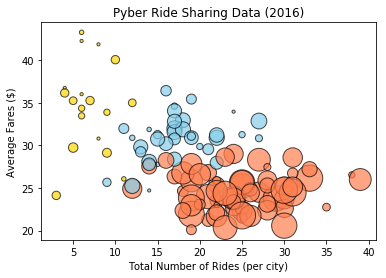

In [17]:
# Show plot
plt.scatter(rides_fares.total_rides, rides_fares.fare, s=rides_fares['driver_count']* 10, marker="o",\
            facecolors=rides_fares['color'], alpha = .7, edgecolors="black")


plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fares ($)")
plt.xlabel("Total Number of Rides (per city)")



## Total Fares by City Type

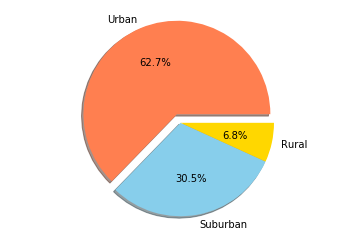

In [10]:
# Calculate Type Percents
urban_total_fares = ride_share_data.fare[ride_share_data.type == 'Urban'].sum()
suburban_total_fares = ride_share_data.fare[ride_share_data.type == 'Suburban'].sum()
rural_total_fares = ride_share_data.fare[ride_share_data.type == 'Rural'].sum()

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]

values = [urban_total_fares, suburban_total_fares, rural_total_fares]

colors = ["coral", "skyblue", 'gold']
plt.pie(values, labels = labels, colors = colors, autopct="%1.1f%%", shadow=True, explode = [.1,0,0])
plt.axis("equal")
# Save Figure
plt.savefig("CityFares.png")
plt.show()

## Total Rides by City Type

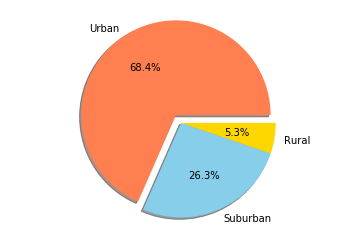

In [12]:
# Calculate Ride Percents
urban_total_count = ride_share_data.fare[ride_share_data.type == 'Urban'].count()
suburban_total_count = ride_share_data.fare[ride_share_data.type == 'Suburban'].count()
rural_total_count = ride_share_data.fare[ride_share_data.type == 'Rural'].count()
# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]

values = [urban_total_count, suburban_total_count, rural_total_count]

colors = ["coral", "skyblue", 'gold']
plt.pie(values, labels = labels, colors = colors, autopct="%1.1f%%", shadow=True, explode = [.1,0,0])
plt.axis("equal")
# Save Figure
plt.savefig("TotalRides.png")
plt.show()

## Total Drivers by City Type

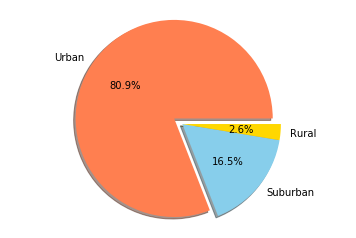

In [14]:
# Calculate Driver Percents
urban_driver_count = rides_fares.driver_count[rides_fares.type == 'Urban'].sum()
suburban_driver_count = rides_fares.driver_count[rides_fares.type == 'Suburban'].sum()
rural_driver_count = rides_fares.driver_count[rides_fares.type == 'Rural'].sum()
# Build Pie Charts
labels = ["Urban", "Suburban", "Rural"]

values = [urban_driver_count, suburban_driver_count, rural_driver_count]

colors = ["coral", "skyblue", 'gold']
plt.pie(values, labels = labels, colors = colors, autopct="%1.1f%%", shadow=True, explode = [.1,0,0])
plt.axis("equal")
# Save Figure
plt.savefig("TotalDrivers.png")
plt.show()